In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [3]:
import scipy.misc

(100, 212)
151
int64


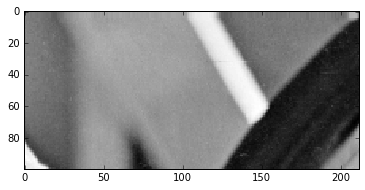

In [4]:
lena = scipy.misc.lena()
plt.gray()
plt.imshow(lena, interpolation='nearest')
lena = lena[:100, 300:]
plt.imshow(lena, interpolation='nearest')
print(lena.shape)
print(lena[90,90])
print(lena.dtype)

torch.Size([100, 212])
151.0

 151
[torch.DoubleTensor of size 1]

torch.Size([1, 100, 212])

 151
 151
 151
[torch.FloatTensor of size 3]

torch.Size([3, 100, 212])


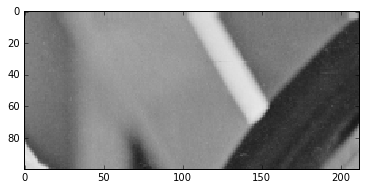

In [5]:
img = torch.from_numpy(lena.astype(float))
print(img.size())
print(img[90,90])
img = img.clone().view(1,100,212)
print(img[:,90,90])
print(img.size())
img = torch.cat((img, img, img), 0).float()
show(img)
print(img[:,90,90])
img.div_(255);
print(img.size())

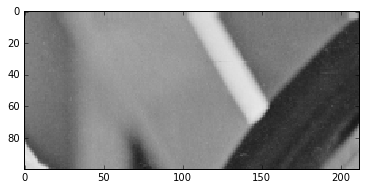

In [6]:
show(transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])(img))

torch.Size([3, 256, 542])


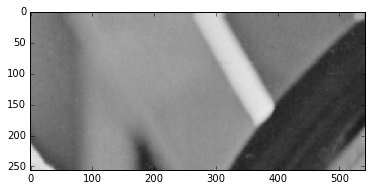

In [7]:
img2 = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Scale(256),
    transforms.ToTensor(),
])(img)
print(img2.size())
show(img2)

In [8]:
import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
cifar = dset.CIFAR10(root="abc/def/ghi", download=True)

Files already downloaded and verified


In [13]:
trans = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [14]:
import torchvision.utils as tutils

(0.3371489570090489, 0.24515368371385993, 0.0, 1.0)
(0.44256409261470253, 0.2971765334316165, 0.0, 0.9960784316062927)
(0.4061938378436025, 0.32892546338681194, 0.0, 1.0)
(0.2704159075874486, 0.18337201969836966, 0.0, 0.9176470637321472)
(0.34992724462032737, 0.2732488478952251, 0.0, 0.9960784316062927)
(0.3060087387730164, 0.25710693466354395, 0.0, 0.9725490212440491)
(0.41604116667743557, 0.2388433838705675, 0.0, 0.9764705896377563)
(0.4606604996988608, 0.24625605326498523, 0.0, 0.9725490212440491)
(0.4938623460972546, 0.3129965597088279, 0.0, 0.9882352948188782)
(0.2621004459118315, 0.2239845061390575, 0.0, 0.8549019694328308)
(0.26454759721430793, 0.11071022852775213, 0.0, 0.5098039507865906)
(0.4611264388361936, 0.32001783467012906, 0.0, 0.9960784316062927)
(0.4666066774840753, 0.30674951653607474, 0.0, 0.9843137264251709)
(0.21249872842918194, 0.2636358923863605, 0.0, 0.9372549057006836)
(0.2946678490996722, 0.21798154353121305, 0.0, 1.0)
(0.4658573437985372, 0.28209593857100396,

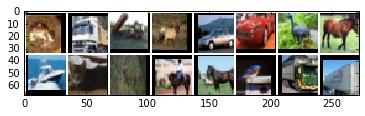

In [15]:
transformed_images = []
for i in range(20):
    transformed_images += [trans(cifar[i][0])]
    print(transformed_images[i].mean(),transformed_images[i].std(), 
          transformed_images[i].min(), transformed_images[i].max())
show(tutils.make_grid(transformed_images))

(-0.3257020916595745, 0.49030737107138356, -1.0, 1.0)
(-0.1148718173111168, 0.5943530690757043, -1.0, 0.9921568632125854)
(-0.1876123301917687, 0.6578509306606333, -1.0, 1.0)
(-0.45916819203800213, 0.36674404239797703, -1.0, 0.8352941274642944)
(-0.3001455154347544, 0.5464976989913715, -1.0, 0.9921568632125854)
(-0.3879825306551841, 0.5142138738794487, -1.0, 0.9450980424880981)
(-0.16791767110892883, 0.4776867721654128, -1.0, 0.9529411792755127)
(-0.07867900658554088, 0.49251211342491164, -1.0, 0.9450980424880981)
(-0.012275311339180917, 0.6259931231081871, -1.0, 0.9764705896377563)
(-0.47579912012831, 0.44796901896179764, -1.0, 0.7098039388656616)
(-0.4709048134003145, 0.22142046144980368, -1.0, 0.019607901573181152)
(-0.07774712605169043, 0.6400356728895145, -1.0, 0.9921568632125854)
(-0.06678664839516084, 0.6134990363534119, -1.0, 0.9686274528503418)
(-0.5750025513892373, 0.5272717873515015, -1.0, 0.8745098114013672)
(-0.410664308796792, 0.43596309108907383, -1.0, 1.0)
(-0.068285313

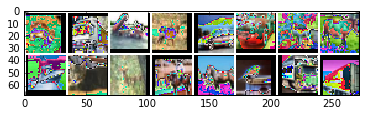

In [16]:
for i in range(20):
    transformed_images[i] = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(transformed_images[i])
    print(transformed_images[i].mean(),transformed_images[i].std(), 
          transformed_images[i].min(), transformed_images[i].max())
show(tutils.make_grid(transformed_images))